In [1]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.express as px
import pandas as pd
import numpy as np

**Tahapan Pengerjaan Tugas**
1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)
2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

In [2]:
pd.set_option('max_columns', 50)
df = pd.read_csv('cleaned_hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out
1,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out
2,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out
3,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out
4,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103.0,0,1,Check-Out


In [8]:
def cancelation_rate_and_lead_time(df):
    df = df.copy()
    
    def month_grouping(rows):
        rows = rows / 30
        if (rows >= 0) & (rows <= 2):
            return '0-2 Months'
        elif (rows >= 3) & (rows <= 4):
            return '3-4 Months'
        elif (rows >= 5) & (rows <= 6):
            return '5-6 Months'
        elif (rows >= 7) & (rows <= 8):
            return '7-8 Months'
        elif (rows >= 9) & (rows <= 10):
            return '9-10 Months'
        else:
            return '11-12 Months'
        
    df['lead_time_grouping'] = df['lead_time'].apply(month_grouping)
    
    # aggregate
    df_aggregate = df.groupby(['hotel', 'lead_time_grouping']).agg({
        "is_canceled": ["sum", "count"]
    })
    df_aggregate = df_aggregate.reset_index() 
    df_aggregate.columns = ['hotel_type', 'lead_time_grouping', 'total_cancellation', 'total_booking']
    
    # calculate cancellation rate
    df_aggregate['cancellation_rate'] = df_aggregate['total_cancellation'] * 100 / df_aggregate['total_booking']
    df_aggregate['cancellation_rate'] = df_aggregate['cancellation_rate'].round(2)   
    
    return df_aggregate

df_aggregate = cancelation_rate_and_lead_time(df)
df_aggregate

,hotel_type,lead_time_grouping,total_cancellation,total_booking,cancellation_rate
0,City Hotel,0-2 Months,6811,28653,23.77
1,City Hotel,11-12 Months,5123,13370,38.32
2,City Hotel,3-4 Months,1730,4892,35.36
3,City Hotel,5-6 Months,1220,3155,38.67
4,City Hotel,7-8 Months,595,1444,41.20
5,City Hotel,9-10 Months,348,677,51.40
6,Resort Hotel,0-2 Months,2982,18248,16.34
7,Resort Hotel,11-12 Months,2802,8341,33.59
8,Resort Hotel,3-4 Months,820,2465,33.27
9,Resort Hotel,5-6 Months,654,2225,29.39


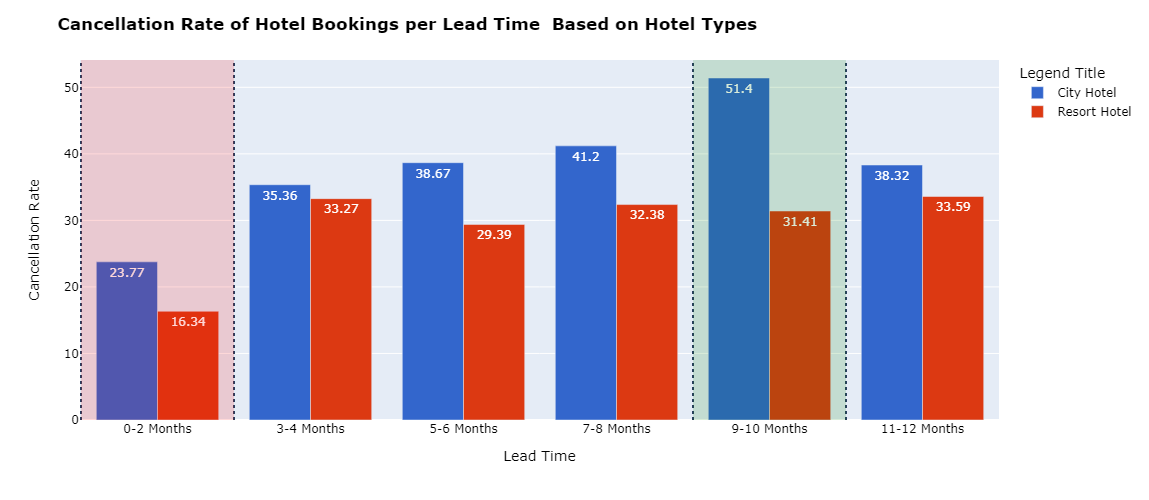

In [32]:
fig = px.bar(df_aggregate,
             x='lead_time_grouping',
             y='cancellation_rate',
             color='hotel_type',
             barmode='group',
             text='cancellation_rate',
             color_discrete_sequence=px.colors.qualitative.G10,
             height=500
            )

fig.add_vline(x=3.5, line_dash="dot")
fig.add_vline(x=4.5, line_dash="dot")
fig.add_vrect(x0='3.5', x1='4.5', col=1,
              fillcolor='green',
              opacity=0.15,
              line_width=0
             )

fig.add_vline(x=-0.5, line_dash="dot")
fig.add_vline(x=0.5, line_dash="dot")
fig.add_vrect(x0='-0.5', x1='0.5', col=1,
              fillcolor='red',
              opacity=0.15,
              line_width=0
             )

fig.update_layout(
    title_text='<b>Cancellation Rate of Hotel Bookings per Lead Time Based on Hotel Types<br>',
    xaxis={'categoryorder':'array',
           'categoryarray':['0-2 Months',
                            '3-4 Months',
                            '5-6 Months',
                            '7-8 Months',
                            '9-10 Months',
                            '11-12 Months'
                           ]
          },
    xaxis_title='Lead Time',
    yaxis_title='Cancellation Rate',
    legend_title="Legend Title",
    font=dict(
        size=12,
        color='black'
    )
)
